In [1]:
#-*- coding: utf-8 -*-

# Zadania maturalne 2017

[Z arkusza](https://cke.gov.pl/egzamin-maturalny/egzamin-w-nowej-formule/arkusze/2017-2/)



## Zadanie 4. Słodzik

Firma Słodzik zajmuje się sprzedażą cukru. W pliku `cukier.txt` znajdują się 2162 wiersze z danymi dotyczącymi sprzedaży w latach 2005-2014. W każdym wierszu podane sądane opisujące jedną transakcję sprzedaży, oddzielone pojedyńczymi znakami tabulacji: data sprzedaży (rrrr-mm-dd), numer NIP klienta (13-znakowy tekst) i ilość sprzedanego cukru w kg (co najwyżej 3-cyfrowa liczba całkowita dodatnia). Transakcje sąuporządkowane niemalejace według daty.

Firma Słodzik ustala cenę sprzedaży w złotych na początku roku. Ustalona cena obowiązuje przez cały rok. W pliku `cennik.txt` przedstawiono ceny sprzdaży 1 kg cukru ustalone przez firmę Słodzik w latach 2005-2014.

Wykorzystaj dostępne narzędzie informatyczne i podaj odpowiedzi do poniższych zadań.

### Zadanie 4.1

Podaj numery NIP trzech klientów, którzy w całym okresie 2005-2014 kupili łącznie najwięcej cukru. Dla każdego z tych klientów podaj łączną liczbę kilogramów zakupionego przez niego cukru.

In [2]:
cukier = open('cukier.txt')
klienci = {}

for line in cukier:
    dane = line.split('\t')
    nip = dane[1]
    kilogramy = int(dane[2])
    if nip not in klienci:
        klienci[nip] = kilogramy
    else:
        klienci[nip] = klienci[nip] + kilogramy

wpisy = list(klienci.items())
wpisy.sort(key=lambda t: t[1], reverse=True)
for n, k in wpisy[:3]:
    print("{0} {1}".format(n,k))

254-14-00-156 27505
847-48-41-699 26955
392-78-93-552 26451


### Zadanie 4.2

Przychód z pojedynczej sprzedaży to cena sprzedaży pomnożona przez liczbę kilogramów sprzedanego cukru. Oblicz łączny przychód firmy Słodzik w latach 2005-2014

In [29]:
cukier = open('cukier.txt')
cennik = open('cennik.txt')

ceny = {}
for line in cennik:
    dane = line.split('\t')
    rok = dane[0].strip()
    cena = dane[1]
    ceny[rok] = float(cena.strip().replace(',', '.'))

przychod = 0
for line in cukier:
    dane = line.split('\t')
    data = dane[0]
    podzial_daty = data.split('-')
    rok = podzial_daty[0]
    kilogramy = int(dane[2])
    przychod = round(przychod + kilogramy*ceny[rok],2)

print(przychod)

643267.07


### Zadanie 4.3

Wykonaj i podaj zestawienie ilości sprzedanego cukru w kolejnych latach, od roku 2015 do roku 2014 włącznie. Następnie utwórz liniowy wykres ilustrujący sprzedaż cukru w kolejnych latach w podanym okresie. Wyskauluj oś pionową co 5000 kg. Pamiętaj o czytelnym opisie wykresu (tytuł i opis). 

W roku: 2005 sprzedano 27016kg cukru
W roku: 2006 sprzedano 27226kg cukru
W roku: 2007 sprzedano 31720kg cukru
W roku: 2008 sprzedano 36523kg cukru
W roku: 2009 sprzedano 30764kg cukru
W roku: 2010 sprzedano 32521kg cukru
W roku: 2011 sprzedano 23778kg cukru
W roku: 2012 sprzedano 26976kg cukru
W roku: 2013 sprzedano 28419kg cukru
W roku: 2014 sprzedano 35284kg cukru


<IPython.core.display.Javascript object>


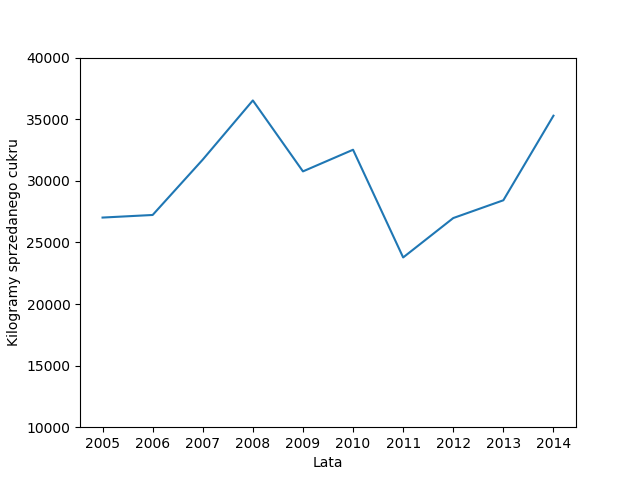

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt


cukier = open('cukier.txt')
klienci = {}

zestawienie = {}
x = list(range(2005, 2015))
for i in x:
    zestawienie[i] = 0
    
for line in cukier:
    dane = line.split('\t')
    data = dane[0]
    rok = int(data.split('-')[0])
    kilogramy = int(dane[2])
    zestawienie[rok] = zestawienie[rok] + kilogramy

y = []
for i in x:
    print("W roku: {0} sprzedano {1}kg cukru".format(i, zestawienie[i]))
    y.append(zestawienie[i])

plt.plot(x,y)
plt.xlabel("Lata")
plt.ylabel("Kilogramy sprzedanego cukru")
plt.xticks(x)
plt.yticks(list(range(10000, 40001, 5000)))
plt.show()


    

### Zadanie 4.4

Na potrzeby zadania 4.4 załóżmy, że firma Słodzik wprowadziła system premiowania klientów hurtowych, który obejmuje lata 2005-2014. Klient otrzymuje przy zakupie rabat, którego wysokość zależy od łącznej ilości cukru zakupionej do tej pory przez tego klienta, wliczając w to ilość cukru w bieżącej transakcji sprzedaży. Wysokość rabatu za każdy kilogram cukru w bieżącej transakcji wynosi:
- 5 gr, jeśli dotychaczas zakupił co najmniej 100 kg, ale mniej niż 1000 kg
- 10 gr, jeśli dotychczas zakupił co najmniej 1000 kg, ale mniej niż 10000 kg
- 20 gr, jeśli dotychaczas zakupił co najmniej 10000 kg
Podaj łaczną wartość rabatów udzielonych przez firmę Słodzik

In [52]:
def rabat(kg):
    if kg >= 10000:
        return 0.2
    elif kg >= 1000:
        return 0.1
    elif kg >= 100:
        return 0.05
    else:
        return 0

cukier = open('cukier.txt')
klienci = {}
calkowity_rabat = 0
for line in cukier:
    dane = line.split('\t')
    nip = dane[1]
    kilogramy = int(dane[2])
    if nip not in klienci:
        klienci[nip] = kilogramy
    else:
        klienci[nip] = klienci[nip] + kilogramy

    calkowity_rabat = round(calkowity_rabat + kilogramy*rabat(klienci[nip]), 2)
print(calkowity_rabat)

38126.35


### Zadanie 4.5

Firma Słodzik chce, aby w magazynie na początku każdego miesiąca znajdowało sięnie mniej niż 5000 kg cukru. Po podsumowaniu miesięcznej sprzedaży uzupełnie stan magazynu: zakupuje towar u producenta. Producent sprzedaje cukier w paletach po 1000 kg. Nie można zakupupić niepełnej palety. Firma Słodzik kupuje tylko tyle palet, żeby uzupełnić stan do conajmniej 5000 kg. Zakup towaru u producenta odbywa sięostatniego dnia miesiąca przed północą.

In [72]:
cukier = open('cukier.txt')
wynik = 0
kilogramy_w_magazynie = 5000
aktualny_miesiac = 1

for line in cukier:
    dane = line.split('\t')
    data = dane[0].split('-')
    kilogramy = int(dane[2])
    miesiac = int(data[1])
    if miesiac == aktualny_miesiac:
        kilogramy_w_magazynie = kilogramy_w_magazynie - kilogramy
    else:
        palety = 0
        while kilogramy_w_magazynie < 5000:
            kilogramy_w_magazynie = kilogramy_w_magazynie + 1000
            palety = palety + 1
        if palety >= 4:
            wynik = wynik + 1
        aktualny_miesiac = miesiac
        kilogramy_w_magazynie = kilogramy_w_magazynie - kilogramy
        
palety = 0
while kilogramy_w_magazynie < 5000:
    kilogramy_w_magazynie = kilogramy_w_magazynie + 1000
    palety = palety + 1
if palety >= 4:
    wynik = wynik + 1
    
print(wynik)

14


## Zadanie 5

Gosia mieszka w Kucykowie i jest fanką lokalnej kobiecej drużyny piłki nożnej Galop Kucykowo. Gosia zbiera informacje o wszystkich wynikach oficjalnych meczów tej drużyny. Informacje te zapisuje w plikach: `drużyny.txt`, `sedziowie.txt`, `wyniki.txt`.
Pierwszy wiersz w każdym z plików jest wierszem nagłówkowym. Dane w każdym wierszu są oddzielone znakiem tabulacji.


In [102]:
class Druzyna:
    def __init__(self, id_druzyny, nazwa, miasto):
        self.id = id_druzyny
        self.nazwa = nazwa
        self.miasto = miasto

class Sedzia:
    def __init__(self, numer_licencji, imie, nazwisko):
        self.numer_licencji = numer_licencji
        self.imie = imie
        self.nazwisko = nazwisko
        
class Wynik:
    def __init__(self, data, rodzaj, gdzie, druzyna, sedzia, bramki_zdobyte, bramki_stracone):
        self.data = data
        self.rodzaj = rodzaj
        self.gdzie = gdzie
        self.druzyna = druzyna
        self.sedzia = sedzia
        self.bramki_zdobyte = bramki_zdobyte
        self.bramki_stracone = bramki_stracone

In [103]:
druzyny = []
sedziowie = []
wyniki = []

for line in open('druzyny.txt').readlines()[1:]:
    dane = line.strip().split('\t')
    druzyny.append(Druzyna(int(dane[0]), dane[1], dane[2]))

for line in open('sedziowie.txt').readlines()[1:]:
    dane = line.split('\t')
    sedziowie.append(Sedzia(dane[0], dane[1], dane[2]))
    
def znajdz_druzyne(szukane_id):
    for druzyna in druzyny:
        if druzyna.id == szukane_id:
            return druzyna
def znajdz_sedziego(szukany_numer):
    for sedzia in sedziowie:
        if sedzia.numer_licencji == szukany_numer:
            return sedzia
    
for line in open('wyniki.txt').readlines()[1:]:
    dane = line.split('\t')
    wyniki.append(Wynik(dane[0], dane[1], dane[2], znajdz_druzyne(int(dane[3])), znajdz_sedziego(dane[4]), int(dane[5]), int(dane[6])))

### Zadanie 5.1

a) Podaj, ile towarszyskich, ile ligowych oraz ile pucharowych meczów rozegrała drużyna Galop Kucykowo z drużynami ze swojego miasta

In [104]:
pucharowe = filter(lambda w: w.rodzaj == 'P', filter(lambda w: w.druzyna.miasto == 'Kucykowo', wyniki))
print(len(list(pucharowe)))
ligowe = filter(lambda w: w.rodzaj == 'L', filter(lambda w: w.druzyna.miasto == 'Kucykowo', wyniki))
print(len(list(ligowe)))
towarzyskie = filter(lambda w: w.rodzaj == 'T', filter(lambda w: w.druzyna.miasto == 'Kucykowo', wyniki))
print(len(list(towarzyskie)))

25
113
6


b) W którym roku drużyna Galop Kucykowo rozegrałą najwiecej meczów z drużynami ze swego miasta? Podaj rok i liczbę tych meczów

In [105]:
grupowanie = {}
for w in filter(lambda w: w.druzyna.miasto == 'Kucykowo', wyniki):
    rok = w.data.split('-')[0]
    if rok not in grupowanie:
        grupowanie[rok] = 1
    else:
        grupowanie[rok] = grupowanie[rok] + 1
elementy = list(grupowanie.items())
elementy.sort(key=lambda t: t[1])
print(elementy[-1])

('2007', 21)


### Zadanie 5.2

Podaj listę zawierającą nazwy drużyn, z którymi drużyna Galop Kucykowo ma zerowy bilans bramkowy.

In [106]:
for druzyna in druzyny:
    zdobyte = sum(map(lambda w: w.bramki_zdobyte, filter(lambda w: w.druzyna.id == druzyna.id, wyniki)))
    stracone = sum(map(lambda w: w.bramki_stracone, filter(lambda w: w.druzyna.id == druzyna.id, wyniki)))
    if zdobyte == stracone:
        print(druzyna.nazwa)

Zwinne Mewy
Nocne Pumy


### Zadanie 5.3

Podaj liczby meczów wyjazdowych - wygranych, przegranych i zremisowanych - przez drużynę Galop Kucykowo

In [112]:
print(len(list(filter(lambda w: w.gdzie == 'W' and w.bramki_zdobyte > w.bramki_stracone, wyniki))))
print(len(list(filter(lambda w: w.gdzie == 'W' and w.bramki_zdobyte == w.bramki_stracone, wyniki))))
print(len(list(filter(lambda w: w.gdzie == 'W' and w.bramki_zdobyte < w.bramki_stracone, wyniki))))

579
170
452


### Zadanie 5.4

Podaj, ilu sędziów spośród tych zapisanych w pliku sedziowie.txt nie sędziowało żadnego pucharowego meczu drużyny Galop Kuzykowo.

In [114]:
sedziowie_pucharowi = list(map(lambda w: w.sedzia.numer_licencji, filter(lambda w: w.rodzaj == 'P', wyniki)))
wynik = 0
for sedzia in sedziowie:
    if sedzia.numer_licencji not in sedziowie_pucharowi:
        wynik += 1
print(wynik)

22


## Zadanie 6

W pliku `dane.txt` znajduje się 200 wierszy. Każdy wiersz zawiera 320 liczb naturalnych z przedziału od 0 do 255, oddzielonych znakami pojedynczego odstępu. Przedstawiają one jasności kolejnych białych pikseli czarno-białego obrazu o wymiarach 320 na 200 pikseli (od 0 - czarny do 255 - biały).

Napisz programy, które dadzą odpowiedzi do poniższych zadań.

### Zadanie 6.1

Podaj janość najjaśniejszego i najciemniejszego piksela

In [118]:
wiersze = []
for line in open("dane.txt"):
    wiersz = []
    for element in line.split(' '):
        wiersz.append(int(element))
    wiersze.append(wiersz)

print(max(map(max, wiersze)))
print(min(map(min, wiersze)))

221
7


### Zadanie 6.2

Podaj, ile wynosi najmniejsza liczba wierszy, które należy usunąć, żęby obraz miał pionową oś symetrii.

In [120]:
def czy_wiersz_ma_symetrie(wiersz):
    i = 0
    j = len(wiersz)-1
    while i < j:
        if wiersz[i] != wiersz[j]:
            return False
        i += 1
        j -= 1
    return True

wynik = 0
for wiersz in wiersze:
    if not czy_wiersz_ma_symetrie(wiersz):
        wynik += 1
print(wynik)

149


### Zadanie 6.3

Sąsziednie piksele to takie, które leżą obok siebie w tym samym wierszu lub tej samej kolumnie. Dwa sąsiednie piksele nazywamy kontrastującymi, jeśli ich wartości różnią się o więcej niż 128. Podaj liczbę wszystkich takich pikseli, dla których istnieje przynajmniej jeden konstrastujący z nim sąsiedni piksel

In [124]:
wynik = 0
for i in range(len(wiersze)):
    for j in range(len(wiersze[i])):
        el = wiersze[i][j]
        if i > 0:
            if abs(wiersze[i-1][j] - el) > 128:
                wynik += 1
                continue
        if i < len(wiersze) - 1:
            if abs(wiersze[i+1][j] - el) > 128:
                wynik += 1
                continue
        if j > 0:
            if abs(wiersze[i][j-1] - el) > 128:
                wynik += 1
                continue
        if j < len(wiersze[i]) - 1:
            if abs(wiersze[i][j+1] - el) > 128:
                wynik += 1
                continue
print(wynik)

753


### Zadanie 6.4

Podaj długość najdłuższej linii pionowej złożonej z pikseli o tej samej jasności,

In [126]:
max_dlugosc = 0
aktualna_dlugosc = 0
aktualna_wartosc = -1

for i in range(len(wiersze)):
    for j in range(len(wiersze[i])):
        aktualna_wartosc = wiersze[i][j]
        aktualna_dlugosc = 1
        k = i + 1
        while k < len(wiersze) and wiersze[k][j] == aktualna_wartosc:
            aktualna_dlugosc += 1
            k += 1
        if aktualna_dlugosc > max_dlugosc:
            max_dlugosc = aktualna_dlugosc
        if max_dlugosc + i + 1 == len(wiersze):
            break
    if max_dlugosc + i + 1 == len(wiersze):
            break
print(max_dlugosc)

5
